## Binary Logistic Regression Regression from scratch

In [161]:
#references:
#scikitlearn
#https://stackoverflow.com/questions/28256058/plotting-decision-boundary-of-logistic-regression

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [139]:
def sigmoid(z):
    return 1/(1+np.exp(-1.0*z))

def accuracy(y,y_):
    y=np.array(y)
    y_=np.array(y_)
    #assert y.shape==y_.shape
    return np.sum(y==y_)*100/len(y)

class LogisticRegressionS:
    def __init__(self, learn_rate = 0.01, epochs = 1000):
        self.alpha = learn_rate
        self.epochs = epochs
        self.weights = None
    def fit(self, X, y, seed = 0):
        np.random.seed(seed)
        #weights = np.random.randn(len(X[0]),1) #random initailisation of params
        weights = np.zeros(X.shape[1])
        for i in range(self.epochs):
            tmp = np.matmul(X,weights)
            Z = sigmoid(tmp)
            tmp = y-Z
            grad = np.matmul(X.T,  tmp) 
            weights += self.alpha*grad
        self.weights = weights
    def predict(self, X):
        Z = np.matmul(X,self.weights)
        prob = sigmoid(Z)   #get the probabilities of ==1
        self.prob = prob
        y_predicted = np.round(prob)     #if P>0.5, then class is 1 else 0
        #np.reshape(y_predicted, (1,len(X)))
        return y_predicted
    

In [140]:
np.round(sigmoid(np.ones((5,3))@ np.ones((3,1))))

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

### Showing Use on IRIS dataset

In [141]:
data = load_iris()

In [142]:
X=np.array(data.data)
y=np.array(data.target)
X=np.delete(X, np.array([1,2]), axis = 1)
y_=[]
for i in y:
    if i==0:
        y_.append(0)
    else:
        y_.append(1)
y=np.array(y_)

#### Plot of  the dataset

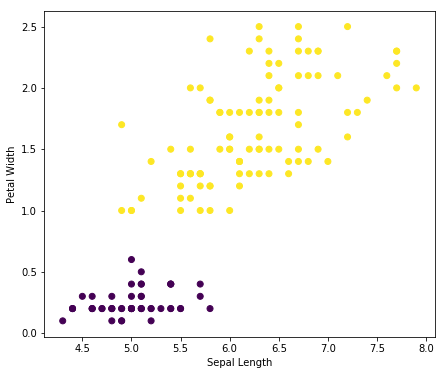

In [143]:
plt.figure(figsize=(7,6))
plt.scatter(X[:,0],X[:,1],c=y)
plt.xlabel('Sepal Length')
plt.ylabel('Petal Width')
plt.show()

In [144]:
#test-train split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [145]:
for i in [X_train, X_test, y_train, y_test]:
    print(i.shape)

(112, 2)
(38, 2)
(112,)
(38,)


In [146]:
LR = LogisticRegressionS(learn_rate=5e-5 ,epochs=3*10**3)

In [147]:
LR.fit(X_train,y_train)

In [148]:
y_pred_train = LR.predict(X_train)
y_pred_test = LR.predict(X_test)

In [149]:
#train_set accuracy
accuracy(y_pred_train, y_train)

99.10714285714286

In [155]:
#test_accuracy
accuracy(y_pred_test, y_test)

100.0

### Plot of decision boundary

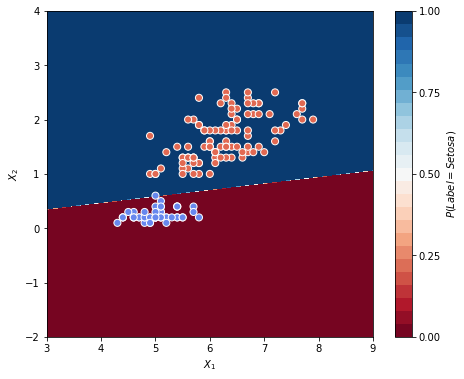

In [162]:
import numpy as np
xx, yy = np.mgrid[3:9:.01, -2:4:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = LR.predict(grid)
probs = probs.reshape(xx.shape)
f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",vmin=0, vmax=1)

ax_c = f.colorbar(contour)
ax_c.set_label("$P(Label = Setosa)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(X[:,0], X[:,1], c=y[:], s=50,cmap=plt.cm.coolwarm, vmin=-.2, vmax=1.2,edgecolor="white", linewidth=1)

ax.set(aspect="equal",xlim=(3, 9), ylim=(-2, 4),xlabel="$X_1$", ylabel="$X_2$")
plt.show()

### Comparing with inbuilt Scikit Learn Model

In [18]:
#comparing with sklearn logistic regression
from sklearn.linear_model import LogisticRegression as LRsk
lr = LRsk()

In [19]:
lr.fit(X_train,y_train)

/home/shivji/.local/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [160]:
y1 = lr.predict(X_train)
y2 = lr.predict(X_test)
print("Train Accuracy, Test Accuracy:")
accuracy(y1, y_train), accuracy(y2, y_test)

Train Accuracy, Test Accuracy:


(100.0, 100.0)